In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import errno
import time

# Find/Union Algorithm for the percolation problem

In [2]:
class FindUnion:
    def __init__(self,n):
        self.n = n 
        self.matrix = np.zeros((n,n))
        self.cluster_dictionary = {}
        self.indices = 0
        self.iteration = 0
        self.P_inf = [] 
        self.x2_cluster = [] #susceptibility
        self.percolation = False
        
    
    def one_block(self, matrix):
        """
        Write a 1 in a given matrix at random.
        """
        self.indices = zip(*np.where(self.matrix == 0))
        np.random.shuffle(self.indices)
        (ind_0,ind_1) = self.indices[0]
        matrix[ind_0][ind_1] = 1
        return ind_0,ind_1
    
    def negbrs(self,i,j):
        """
        Check if the neighbors are part of a cluster.
        If there is only one cluster linked to the neighbor you append to this cluster.
        If there is more than one cluster linked, you merge.
        """
        neigh = False
        key = []
        for k,vals in b.cluster_dictionary.items():
            if (i+1, j) in vals:
                if k not in key:
                    key.append(k)
                neigh = True
            if (i, j+1) in vals:
                if k not in key:
                    key.append(k)
                neigh = True
            if (i-1, j) in vals:
                if k not in key:
                    key.append(k)
                neigh = True
            if (i, j-1) in vals:
                if k not in key:
                    key.append(k)
                neigh = True
        
        if len(key) != 0:
            self.cluster_dictionary[key[0]].append((i,j))
            
        if len(key) == 2: 
            if len(self.cluster_dictionary[key[0]]) >= len(self.cluster_dictionary[key[1]]):
                vv = self.cluster_dictionary.pop(key[1])
                #We need to do this, because you have a list in order to append each element
                for i in vv: 
                    self.cluster_dictionary[key[0]].append(i)
                
            elif len(self.cluster_dictionary[key[0]]) < len(self.cluster_dictionary[key[1]]):
                vv = self.cluster_dictionary.pop(key[0]) 
                for i in vv:
                    self.cluster_dictionary[key[1]].append(i)
            
        if len(key) == 3:            
            vv = self.cluster_dictionary.pop(key[0]) 
            vvv = self.cluster_dictionary.pop(key[1])
            for i in vv:
                self.cluster_dictionary[key[2]].append(i)
            for i in vvv:
                self.cluster_dictionary[key[2]].append(i)
            
        
        if len(key) == 4:
            vv = self.cluster_dictionary.pop(key[0])
            vvv = self.cluster_dictionary.pop(key[1])
            vvvv = self.cluster_dictionary.pop(key[2])
            for i in vv:
                self.cluster_dictionary[key[3]].append(i)
            for i in vvv:
                self.cluster_dictionary[key[3]].append(i)
            for i in vvv:
                self.cluster_dictionary[key[3]].append(i)    
            
        return neigh
        
    def dict_key_g_value(self,val):
        """
        Print a key for a given value that already exists on dictionary
        """
        return self.cluster_dictionary.keys()[self.cluster_dictionary.values().index(val)]
    
    def image_matrix(self):
        """Plot image of the matrix"""
        plt.imshow(self.matrix)
        plt.show()
    
    def write_block(self):
        """
        Write a 1 in the matrix and feeds cluster dictionary using negbrs.
        """
        ind_0,ind_1 = self.one_block(self.matrix)
        check_neighbors = self.negbrs(ind_0,ind_1)
        if not check_neighbors:
            self.cluster_dictionary[self.iteration] = [(ind_0,ind_1)]
        self.iteration += 1
    
    def big_clus(self):
        """
        Return the biggest cluster.
        """
        c_number = []
        for i in self.cluster_dictionary.keys():
            c_number.append(len(b.cluster_dictionary[i]))
        m = np.argmax(c_number)
        locations = [t for i, t in enumerate(self.cluster_dictionary) if i == m]
        k = self.dict_key_g_value(self.cluster_dictionary[locations[0]])
        return k
    
    def suc_(self):
        """
        Give the succeptability removing percolated clusters.
        """
        c_number = []
        key = self.cluster_dictionary.keys()
        if self.percolation:
            key.remove(self.big_clus())
        
        if len(key) == 0:
            return 0.
        
        for i in key:
            c_number.append(len(self.cluster_dictionary[i]))
            
        l,ct = np.unique(c_number, return_counts= True)
        return np.sum((ct)*(l**2.))
   
    def check_percolation(self):
        """
        Check percolation only on the biggest cluster
        """
        vals = self.cluster_dictionary[self.big_clus()]
        if not self.percolation:
            for i in range(self.n):
                if (0,i) in vals:
                    if (self.n-1,i) in vals:
                        self.percolation = True
        if self.percolation:
            P_inf_r = len(vals)/float(self.iteration)
        if not self.percolation:
            P_inf_r = 0.    
        x2_r = self.suc_()
        
        return P_inf_r, x2_r
    
    def iterate(self,m, plot= False):
        """
        Do m iterations and write statistics for each step.
        Plot these interactions puting plot = True
        """
        for _ in range(int(m)):
            self.write_block()
            pp, xx = self.check_percolation()
            self.P_inf.append(pp)
            self.x2_cluster.append(xx)
            if plot:
                self.image_matrix()
    
    def write_file(self,i):
        """
        Write data on a directory.
        The file name is: variable_lenght.txt
        variable: x2 -> Susceptibillity
                  P_inf_ -> P Infinite
                  
        """
        
        p = np.arange(0.,self.n**2)/self.n**2
        dirname = 'data' #Directory name
        if not dirname in os.listdir(os.getcwd()):
            try:
                os.makedirs(dirname) #create your directory
            except OSError as exc: 
                if exc.errno != errno.EEXIST:
                    raise
        os.chdir('/home/nahum/Dropbox/CBPF/Python/Codigos/Cluster_Finder/data') 
            
        if not str(n) in os.listdir(os.getcwd()):
            try:
                os.makedirs(str(n)) #create your directory
            except OSError as exc: 
                if exc.errno != errno.EEXIST:
                    raise
                        
        path = os.getcwd() + '/' + str(n) + '/'
        filename = str(n) + '_' + str(i) + ".txt"
        
        #save susceptibillity
        np.savetxt(path+ 'x2_' + filename, np.array(zip(p,self.x2_cluster)), header='Susceptibillity')
        #save P_inf
        np.savetxt(path+ 'P_inf_' + filename, np.array(zip(p,self.P_inf)), header='P_infinite')
        os.chdir('..')
        
    def run(self,N):
        """
        Run the code for all cells for N times.
        And store the data in a file.
        """
        
        self.iterate(self.n**2.)
        self.write_file(N)

## Use the cell bellow in order to run the simulation N times of n Cells
## and write N files on the desired directory

In [3]:
%%time
n = 100
N = 100
for i in range(N):
    b = FindUnion(n)
    b.run(i+1)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
CPU times: user 2h 1min 18s, sys: 4.29 s, total: 2h 1min 22s
Wall time: 2h 1min 21s


In [4]:
%%time
n = 120
N = 100
for i in range(N):
    b = FindUnion(n)
    b.run(i+1)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
CPU times: user 4h 17min 15s, sys: 8.73 s, total: 4h 17min 24s
Wall time: 4h 17min 18s


## Building samples for the finite size scaling

In [3]:
%%time
j = [50,100]
N = 100
for n in j:
    for i in range(N):
        b = FindUnion(n)
        b.run(i+1)

CPU times: user 11h 30min 45s, sys: 19.1 s, total: 11h 31min 4s
Wall time: 11h 30min 48s


## If you want to see plots of P_inf and x2

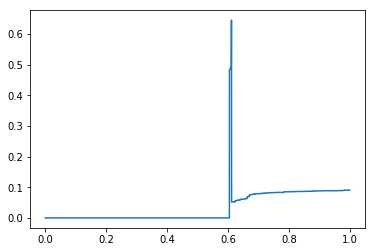

In [4]:
p = np.arange(1.,n**2+1)/n**2
plt.plot(p, b.P_inf)
plt.show()

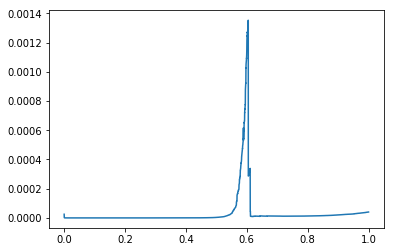

In [5]:
plt.plot(p,b.x2_cluster)
plt.show()

## This program scales with N²

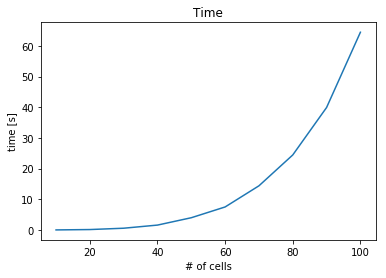

In [76]:
plt.plot(x, t)
plt.title('Time')
plt.xlabel('# of cells')
plt.ylabel('time [s]')
plt.show()

In [75]:
t = []
x = np.linspace(10, 100, 10, dtype=int)
for n in x:
    samples = []
    # take 10 samples to estimate mean time
    for _ in range(10):
        b = FindUnion(n)
        start = time.clock()
        b.iterate(n**2)
        end = time.clock()
        samples.append(end - start)
    t.append(sum(samples)/10)